# ARIMA Model 

### Add Project directory to system path

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

### Load Module

In [2]:
from script.ARIMA_model import Modelling
modelling=Modelling()

### Load Stoke Price Data

In [3]:
import pandas as pd
stoke_data=pd.read_csv("data/stoke_data.csv")

## **Modelling For Tesla(TSLA) Stock Price**

### **Check Stationarity**

In [4]:
modelling.check_stationarity(stoke_data,'TSLA')

2024-11-11 14:20:15,989 - INFO - Stationarity of the time series data is checked.


Test Statistics: -1.1507672706146044
p-Value: 0.6944080657685303
Lag used: 27
Number of observation: 27
Critical Values': {'1%': np.float64(-3.433026277967909), '5%': np.float64(-2.862722353917318), '10%': np.float64(-2.56739941472018)}
Conclusion: Non-Stationary


### **Train-Test Split**

In [5]:
train,test=modelling.train_test_split(stoke_data,'TSLA')

2024-11-11 14:20:16,016 - INFO - Train-Test split is done with a ratio of 0.8.


### **Grid Search p,q and d parameters**

In [6]:
best_params=modelling.grid_search(train)

2024-11-11 14:21:50,437 - INFO - Grid search is use to find the best orders of the ARIMA model.


Best ARIMA parameters: (2, 1, 3)


### **Train with ARIMA model**

In [7]:
forecast=modelling.arima_train(train,test,best_params)

2024-11-11 14:21:52,418 - INFO - The best orders are used to fit the ARIMA model.


### **Evaluate**

In [8]:
modelling.evaluate_arima_model(test,forecast)

2024-11-11 14:21:52,437 - INFO - Evaluatio Metrics to assses the performance of the model.


Mean Absolute Error (MAE): 38.70688663402304
Mean Squared Error (MSE): 2389.3652003374646
Root Mean Squared Error (RMSE): 48.881133378200886
R Square Score (r2_score): -0.6027045088243332
Mean Absolute Percentage Error (MAPE): 17.536726022187462 %


### **Plot Result**

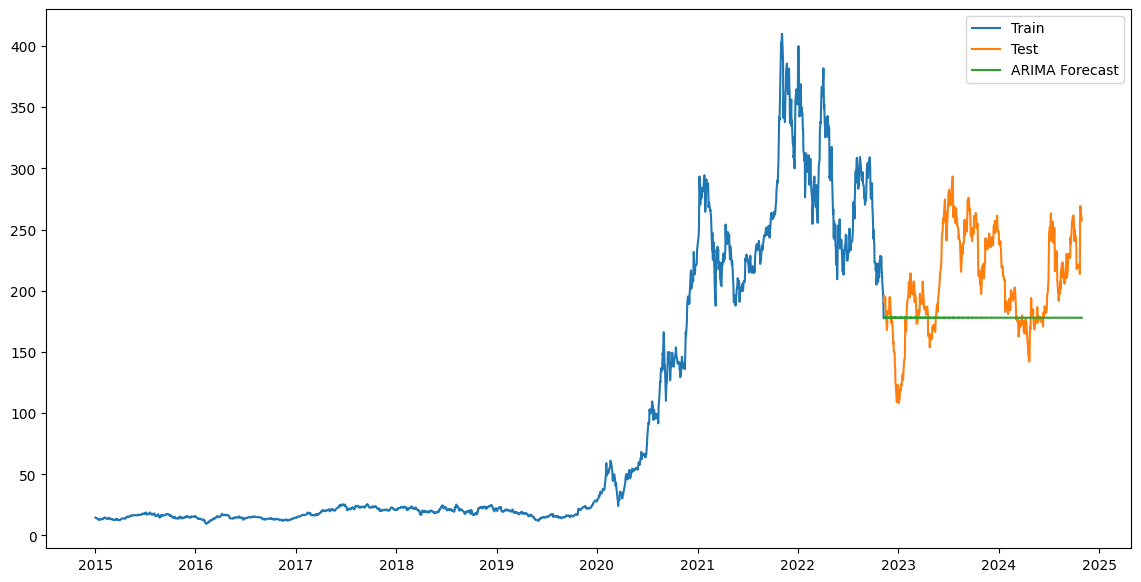

2024-11-11 14:21:52,867 - INFO - Plot of the resulting prediction.


In [9]:
modelling.plot_result(train,test,forecast)